In [3]:
import numpy as np

In [32]:
m = 120000 # koszt mieszkania
freq = 12 # kapitalizacja odsetek i płatności z tytułu raty – 12 razy w roku
rate_m = 0.05 # przez następne 5 lat ceny mieszkań będą rosły w tempie 5% rocznie.
rate_b = 0.12 # bank oferuje nominalną stopę procentową w wysokości 12% w skali roku, przy kapitalizacji miesięcznej
years = 5 # okres oszczędziania i drożenia mieszkania

rate_m /= freq  # konwersja stopy do okresu miesięcznego
rate_b /= freq  # konwersja stopy do okresu miesięcznego
nper = years * freq  # liczba wszystkich okresów
nper

60

In [7]:
rate_m

0.004166666666666667

In [8]:
rate_b

0.01

In [33]:
periods = np.arange(0,nper+1,dtype=int)
periods

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60])

# Cena mieszkania po 5 latach

In [11]:
import numpy_financial as npf

In [34]:
future_value = - np.around(npf.fv(rate_m, periods, 0 , m),2)
future_value

array([120000.  , 120500.  , 121002.08, 121506.26, 122012.53, 122520.92,
       123031.42, 123544.06, 124058.82, 124575.73, 125094.8 , 125616.03,
       126139.43, 126665.01, 127192.78, 127722.75, 128254.93, 128789.32,
       129325.95, 129864.8 , 130405.91, 130949.26, 131494.89, 132042.78,
       132592.96, 133145.43, 133700.2 , 134257.29, 134816.69, 135378.43,
       135942.51, 136508.93, 137077.72, 137648.88, 138222.41, 138798.34,
       139376.67, 139957.4 , 140540.56, 141126.15, 141714.17, 142304.65,
       142897.58, 143492.99, 144090.88, 144691.26, 145294.14, 145899.53,
       146507.44, 147117.89, 147730.88, 148346.43, 148964.54, 149585.22,
       150208.49, 150834.36, 151462.84, 152093.93, 152727.66, 153364.02,
       154003.04])

In [35]:
m_5 = future_value[-1]
m_5

154003.04

# Miesięczna wpłata, aby uzbierać na mieszkanie

In [36]:
monthly_payment = - np.around(npf.pmt(rate_b, nper, 0 , m_5),2)
monthly_payment

1885.68

In [37]:
deposit = - np.around(npf.fv(rate_b, periods, monthly_payment , 0),2)
deposit

array([     0.  ,   1885.68,   3790.22,   5713.8 ,   7656.62,   9618.86,
        11600.73,  13602.42,  15624.12,  17666.04,  19728.38,  21811.35,
        23915.14,  26039.97,  28186.05,  30353.59,  32542.81,  34753.92,
        36987.14,  39242.69,  41520.8 ,  43821.68,  46145.58,  48492.72,
        50863.32,  53257.64,  55675.89,  58118.33,  60585.2 ,  63076.73,
        65593.17,  68134.79,  70701.81,  73294.51,  75913.14,  78557.95,
        81229.21,  83927.18,  86652.13,  89404.33,  92184.06,  94991.58,
        97827.17, 100691.12, 103583.72, 106505.23, 109455.97, 112436.2 ,
       115446.25, 118486.39, 121556.93, 124658.18, 127790.44, 130954.03,
       134149.25, 137376.42, 140635.87, 143927.9 , 147252.86, 150611.07,
       154002.86])

In [38]:
print(f"Cena mieszkania po 5 latach: {m_5}PLN")
print(f"Miesięczna wpłata na lokatę: {monthly_payment}PLN")

Cena mieszkania po 5 latach: 154003.04PLN
Miesięczna wpłata na lokatę: 1885.68PLN


# Wykres 

In [28]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Kwota (pln)')

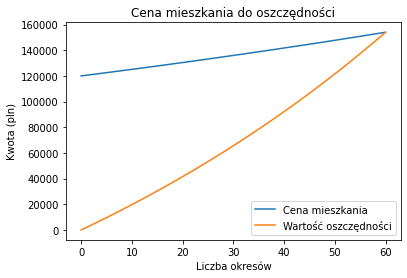

In [40]:
plt.plot(periods, future_value, label='Cena mieszkania')
plt.plot(periods, deposit, label='Wartość oszczędności')
plt.title("Cena mieszkania do oszczędności")
plt.legend()
plt.xlabel('Liczba okresów')
plt.ylabel('Kwota (pln)')